![neural](https://media.springernature.com/lw630/nature-cms/uploads/collections/Networks-Collection-img-final-f2c265a59e457f48645e2aa3ff90e942.jpg)

##**Breast Cancer Classification with a Neural Network**

**By Naureen Hossain**


**Step 1: Import the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

**Step 2: Data Collection**

Scikit Learn is a machine learning library that includes a very simple binary classification data set. The data set classifies breast cancer tumors into malginant and benign.

We will import the library using the variable breast_cancer_data

In [ ]:
breast_cancer_data = sklearn.datasets.load_breast_cancer()

**Step 3: Loading the Data to a Data Frame**

We will load the data into a dataframe using the Pandas library under the variable 'X'. Using the DataFrame function we can load the data (breast_cancer_data.data and set the columns with the feature names from the data (breast_cancer_data.feature_names). We will load the target data under the variable 'Y' to seperate the features from the target.


In [ ]:
X = pd.DataFrame(breast_cancer_data.data, columns = breast_cancer_data.feature_names)
Y = breast_cancer_data.target

**Step 4: Adding the Target to the Data Frame**

We will add the target column from the dataset. We will call our target column 'label' with 0 and 1 representing malignant and benign, respectively


In [ ]:
X['label'] = breast_cancer_data.target

**Visualization of our Data Frame**

In [ ]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Given our (30) features in the table above, the model will predict if the tumor is malignant or benign. We have 568 data points. 

1--> 357 Benign<br>
0--> 212 Malignant 

We can check the distribution of our target variable to see how many subjects in each label. We want to make sure there isn't a huge imbalance in data points that are assigned to each category or the model will not train correctly.

In [ ]:
X['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

**Step 5: Splitting the Data into Training and Testing Data**

We will split the data using the train_test_split function. We will use a test size of 0.15 (15% percent of the data) and a random state of 1. We will also standardize the data using sklearn.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


Test size chosen was 15% of the data, or 86 points.
Training will be done with 85% of the data, or 483 points.

In [ ]:
X_train.shape

(483, 31)

In [ ]:
X_test.shape

(86, 31)

We will also standardize the data using sklearn for optimal results.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

**Building the Neural Network**<br>
Using Keras and Tensor Flow

![image](https://victorzhou.com/media/nn-series/network.svg)

**Step 6: Defining a Neural Network Model**

First we will beuild the layers of the neural network using the function keras.Sequential which groups a linear stack of layers into the model. Our input layer will be Flat, the hideen layer Dense, and the output layer Dense. 'Dense' means all neurons in the previous layer will be connected to the current layer.The purpose of 'Flatten' is to create an array that assigns one neuron to each feature.

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,))
                          keras.layers.Dense(10, activation='relu')
                          keras.layers.Dense(2, activation='sigmoid')
])

**Step 7: Compiling the Model**


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Step 8: Fitting the Model**

In [ ]:
history = model.fit(X_train_st, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
14/14 [==============================] - 1s 22ms/step - loss: 0.8965 - accuracy: 0.5484 - val_loss: 1.0068 - val_accuracy: 0.5510
Epoch 2/10
14/14 [==============================] - 0s 4ms/step - loss: 0.6538 - accuracy: 0.6728 - val_loss: 0.7270 - val_accuracy: 0.6327
Epoch 3/10
14/14 [==============================] - 0s 5ms/step - loss: 0.4832 - accuracy: 0.7719 - val_loss: 0.5209 - val_accuracy: 0.7143
Epoch 4/10
14/14 [==============================] - 0s 4ms/step - loss: 0.3598 - accuracy: 0.8479 - val_loss: 0.3730 - val_accuracy: 0.8367
Epoch 5/10
14/14 [==============================] - 0s 4ms/step - loss: 0.2684 - accuracy: 0.9217 - val_loss: 0.2722 - val_accuracy: 0.9184
Epoch 6/10
14/14 [==============================] - 0s 4ms/step - loss: 0.2045 - accuracy: 0.9631 - val_loss: 0.2006 - val_accuracy: 0.9184
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1577 - accuracy: 0.9770 - val_loss: 0.1525 - val_accuracy: 0.9592
Epoch 8/10
14/14 [=

#We have a test accuracy of 99%
#We have a validation accuracy of 97%

**Visualize the Results**

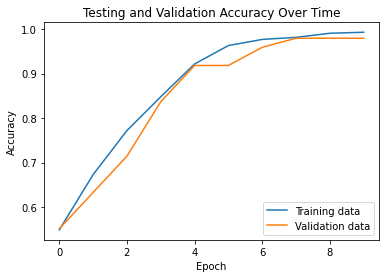

In [ ]:
test_accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]
plt.plot(test_accuracy)
plt.plot(val_accuracy)
plt.title('Testing and Validation Accuracy Over Time')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc = 'lower right')

**Step 9: Perform Stratified K-Fold Cross Validation**

In [ ]:
skf = KFold(n_splits=10, shuffle=True)
skf.get_n_splits(X)

10

In [ ]:
skf = KFold(n_splits=10, shuffle=True)
accuracy_list=[]
for train, test in skf.split(X,Y):
  history = model.fit(X.loc[train],Y[train],epochs=10,verbose=False)
  Y_test_pred = model.predict(X.loc[test])
  Y_pred_labels = [np.argmax(i) for i in Y_test_pred]
  fold_accuracy=sum(Y_pred_labels==Y[test])/len(Y[test])
  accuracy_list.append(fold_accuracy)
print(accuracy_list)  

2/2 [==============================] - 0s 7ms/step
[0.8245614035087719, 0.8771929824561403, 0.9122807017543859, 0.8771929824561403, 0.8596491228070176, 0.8245614035087719, 0.8771929824561403, 0.8947368421052632, 0.8947368421052632, 0.875]
